In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None) 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ColumnaY='VotosGuiller2daVuelta'
#VotosPinera2daVuelta

In [0]:
!ls "/content/drive/My Drive"

'analisis magister proyecto.gdoc'
 AnyDesk.app
'aws datos'
'Calculo Arancel.gsheet'
 casem2017dataset.rar
 casem2017.rar
'Colab Notebooks'
'Copia de casem2017.rar'
 dataparaestadisticas.xlsx
 ExamenDDOJairoPinilla.pdf.gdoc
 field-guide-to-data-science.pdf
'Horario DDS y MDS 2019_Alumnos.gsheet'
'Horario DDS y MDS 2019_Alumnos.xlsx'
'jupyter en aws.gdoc'
'llave maquina magister'
 Magister
'Pitch analisis.gslides'
'Primer trabajo.docx'
'proyecto Rancagua'
 pythondatasciencehandbook.pdf
'RedGate SQL Toolbelt 1.8.2.497-20191022T223305Z-001.zip'
 Sincropdf
'Trabajo Visualización Magister'


In [0]:
def sacarAcentos(s):
    if isinstance(s, str):
        s = s.replace('á', 'a')
        s = s.replace('é', 'e')
        s = s.replace('í', 'i')
        s = s.replace('ó', 'o')
        s = s.replace('ú', 'u')
        s = s.replace('Á', 'A')
        s = s.replace('É', 'E')
        s = s.replace('Í', 'I')
        s = s.replace('Ó', 'O')
        s = s.replace('Ú', 'U')
    return s

In [0]:
dataPartidosClasificados = pd.read_excel('/content/drive/My Drive/Magister/Presidenciales2017/data/PartidosClasificacion.xlsx')
dataPartidosClasificados.head(2)

,Partidos,clasificacion
0,AMPLITUD,Centro_Derecha_Nacional
1,DEMOCRACIA REGIONAL PATAGONICA,Centro_Derecha_Regional


In [0]:
dataMunicipales2016 = pd.read_excel('/content/drive/My Drive/Magister/Presidenciales2017/data/Municipales2016.xlsx')
dataMunicipales2016.head(3)

,Distrito,Circunscripción,Comuna,Provincia,Región,Región N,Votos TER,Partido,Candidato,Nen Voto,Tipo
0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,IQUIQUE,DE TARAPACA,1.0,7,PODER,RUBEN ALEJANDRO LOPEZ PARADA,1.0,M
1,2.0,ALTO HOSPICIO,ALTO HOSPICIO,IQUIQUE,DE TARAPACA,1.0,66,PARTIDO DEMOCRATA CRISTIANO,PATRICIO ELIAS FERREIRA RIVERA,2.0,M
2,2.0,ALTO HOSPICIO,ALTO HOSPICIO,IQUIQUE,DE TARAPACA,1.0,52,UNION DEMOCRATA INDEPENDIENTE,RAMON GALLEGUILLOS CASTILLO,3.0,M


In [0]:
dataMunicipales2016.applymap(lambda x: x.strip() if isinstance(x, str) else x)
dataMunicipales2016.applymap(lambda x: sacarAcentos(x) if isinstance(x, str) else x)
dataPartidosClasificados.applymap(lambda x: x.strip() if isinstance(x, str) else x)
dataPartidosClasificados.applymap(lambda x: sacarAcentos(x) if isinstance(x, str) else x)
len(dataMunicipales2016)

271343

In [0]:
dataRegiones = dataMunicipales2016[['Comuna','Región']]
dataRegiones=dataRegiones.drop_duplicates()
dataRegiones=dataRegiones.reset_index()
dataRegiones=pd.get_dummies(dataRegiones, columns=['Región'])
dataRegiones = dataRegiones.drop(columns=['index'])
dataRegiones.head()

,Comuna,Región_AISEN DEL GRAL. CARLOS IBAÑEZ,Región_ARICA Y PARINACOTA,Región_DE ANTOFAGASTA,Región_DE ATACAMA,Región_DE COQUIMBO,Región_DE LA ARAUCANIA,Región_DE LOS LAGOS,Región_DE LOS RIOS,Región_DE MAGALLANES Y ANTARTICA CH.,Región_DE TARAPACA,Región_DE VALPARAISO,Región_DEL BIOBIO,Región_DEL LIBERTADOR BDO. O'HIGGINS,Región_DEL MAULE,Región_METROPOLITANA DE SANTIAGO
0,ALTO HOSPICIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,LOS VILOS,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,CANELA,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,MONTE PATRIA,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,OVALLE,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [0]:
dataMinuClasi = pd.merge(dataMunicipales2016, dataPartidosClasificados, left_on='Partido',right_on='Partidos',how='inner')
len(dataMinuClasi)

271328

In [0]:
dataClasificacionAgrupados=pd.DataFrame(dataMinuClasi.groupby(['Comuna', 'clasificacion'])['Votos TER'].agg('sum'))
dataClasificacionAgrupados.head()

Votos TER
Comuna    clasificacion              
AISEN     Derecha_Nacional       4644
          Independiente          2930
          VOTOS EN BLANCO         116
          VOTOS NULOS             127
ALGARROBO Independiente          5695

In [0]:
dataClasificacionAgrupados=pd.pivot_table(dataClasificacionAgrupados, values = 'Votos TER', index=['Comuna'],columns = 'clasificacion').reset_index()
dataClasificacionAgrupados=dataClasificacionAgrupados.fillna(0)
dataClasificacionAgrupados.head(3)

clasificacion,Comuna,Centro_Derecha_Nacional,Centro_Derecha_Regional,Centro_Izquierda_Nacional,Centro_Izquierda_Regional,Derecha_Nacional,Independiente,Izquierda_Nacional,Izquierda_Regional,VOTOS EN BLANCO,VOTOS NULOS
0,AISEN,0.0,0.0,0.0,0.0,4644.0,2930.0,0.0,0.0,116.0,127.0
1,ALGARROBO,0.0,0.0,0.0,0.0,0.0,5695.0,0.0,0.0,68.0,91.0
2,ALHUE,0.0,0.0,0.0,0.0,0.0,2477.0,602.0,0.0,11.0,12.0


In [0]:
len(dataClasificacionAgrupados)

346

In [0]:
dataPresidenciales = pd.read_excel('/content/drive/My Drive/Magister/Presidenciales2017/data/PresidencialesPorComuna.xlsx')
dataPresidenciales.head(3)

,VotosPinera2daVuelta,VotosGuiller2daVuelta,VotosTotalesMesaPrimera,VotosTotalesMesaSegunda,Region,Comuna,Provincia,ALEJANDRO GUILLIER ALVAREZ,ALEJANDRO NAVARRO BRAIN,BEATRIZ SANCHEZ MUÑOZ,CAROLINA GOIC BOROEVIC,EDUARDO ARTES BRICHETTI,JOSE ANTONIO KAST RIST,MARCO ENRIQUEZ-OMINAMI GUMUCIO,SEBASTIAN PIÑERA ECHENIQUE,Votos Blancos,Votos Nulos,GanadorSegunda,GanadorPrimera
0,9969,7466,0,0,1,ALTO HOSPICIO,IQUIQUE,3630,54,4492,868,82,2070,1743,5552,76,117,GanoPinera2,GanoPinera1
1,617,179,0,0,1,CAMIÑA,DEL TAMARUGAL,124,2,78,10,3,42,44,445,1,15,GanoPinera2,GanoPinera1
2,814,76,0,0,1,COLCHANE,DEL TAMARUGAL,61,8,35,15,1,61,35,413,4,13,GanoPinera2,GanoPinera1


In [0]:
dataPresidenciales=dataPresidenciales[['Comuna',ColumnaY]]
dataPresidenciales.head(2)

,Comuna,VotosGuiller2daVuelta
0,ALTO HOSPICIO,7466
1,CAMIÑA,179


In [0]:
len(dataPresidenciales)

345

In [0]:
dataPresidenciales.applymap(lambda x: x.strip() if isinstance(x, str) else x)
dataPresidenciales.applymap(lambda x: sacarAcentos(x) if isinstance(x, str) else x)
data = pd.merge(dataPresidenciales, dataClasificacionAgrupados, left_on='Comuna',right_on='Comuna',how='inner')
len(data)

345

In [0]:
data.head(2)

,Comuna,VotosGuiller2daVuelta,Centro_Derecha_Nacional,Centro_Derecha_Regional,Centro_Izquierda_Nacional,Centro_Izquierda_Regional,Derecha_Nacional,Independiente,Izquierda_Nacional,Izquierda_Regional,VOTOS EN BLANCO,VOTOS NULOS
0,ALTO HOSPICIO,7466,6158.0,0.0,0.0,0.0,4795.0,2098.0,0.0,653.0,148.0,310.0
1,CAMIÑA,179,951.0,0.0,0.0,0.0,0.0,676.0,0.0,0.0,17.0,18.0


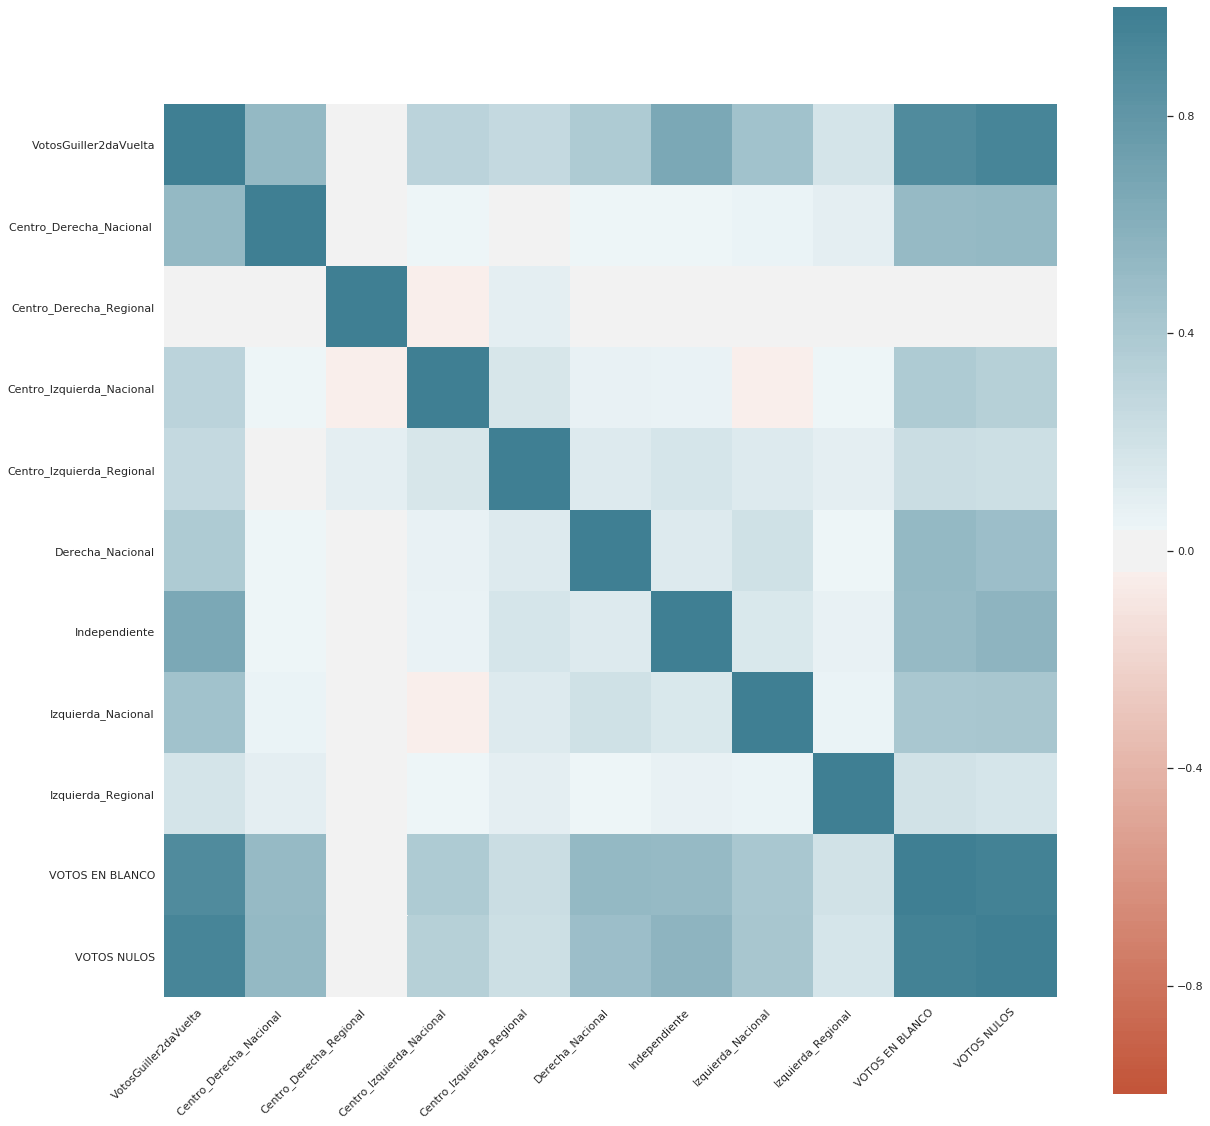

In [0]:
f, ax = plt.subplots(figsize=(20, 20))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

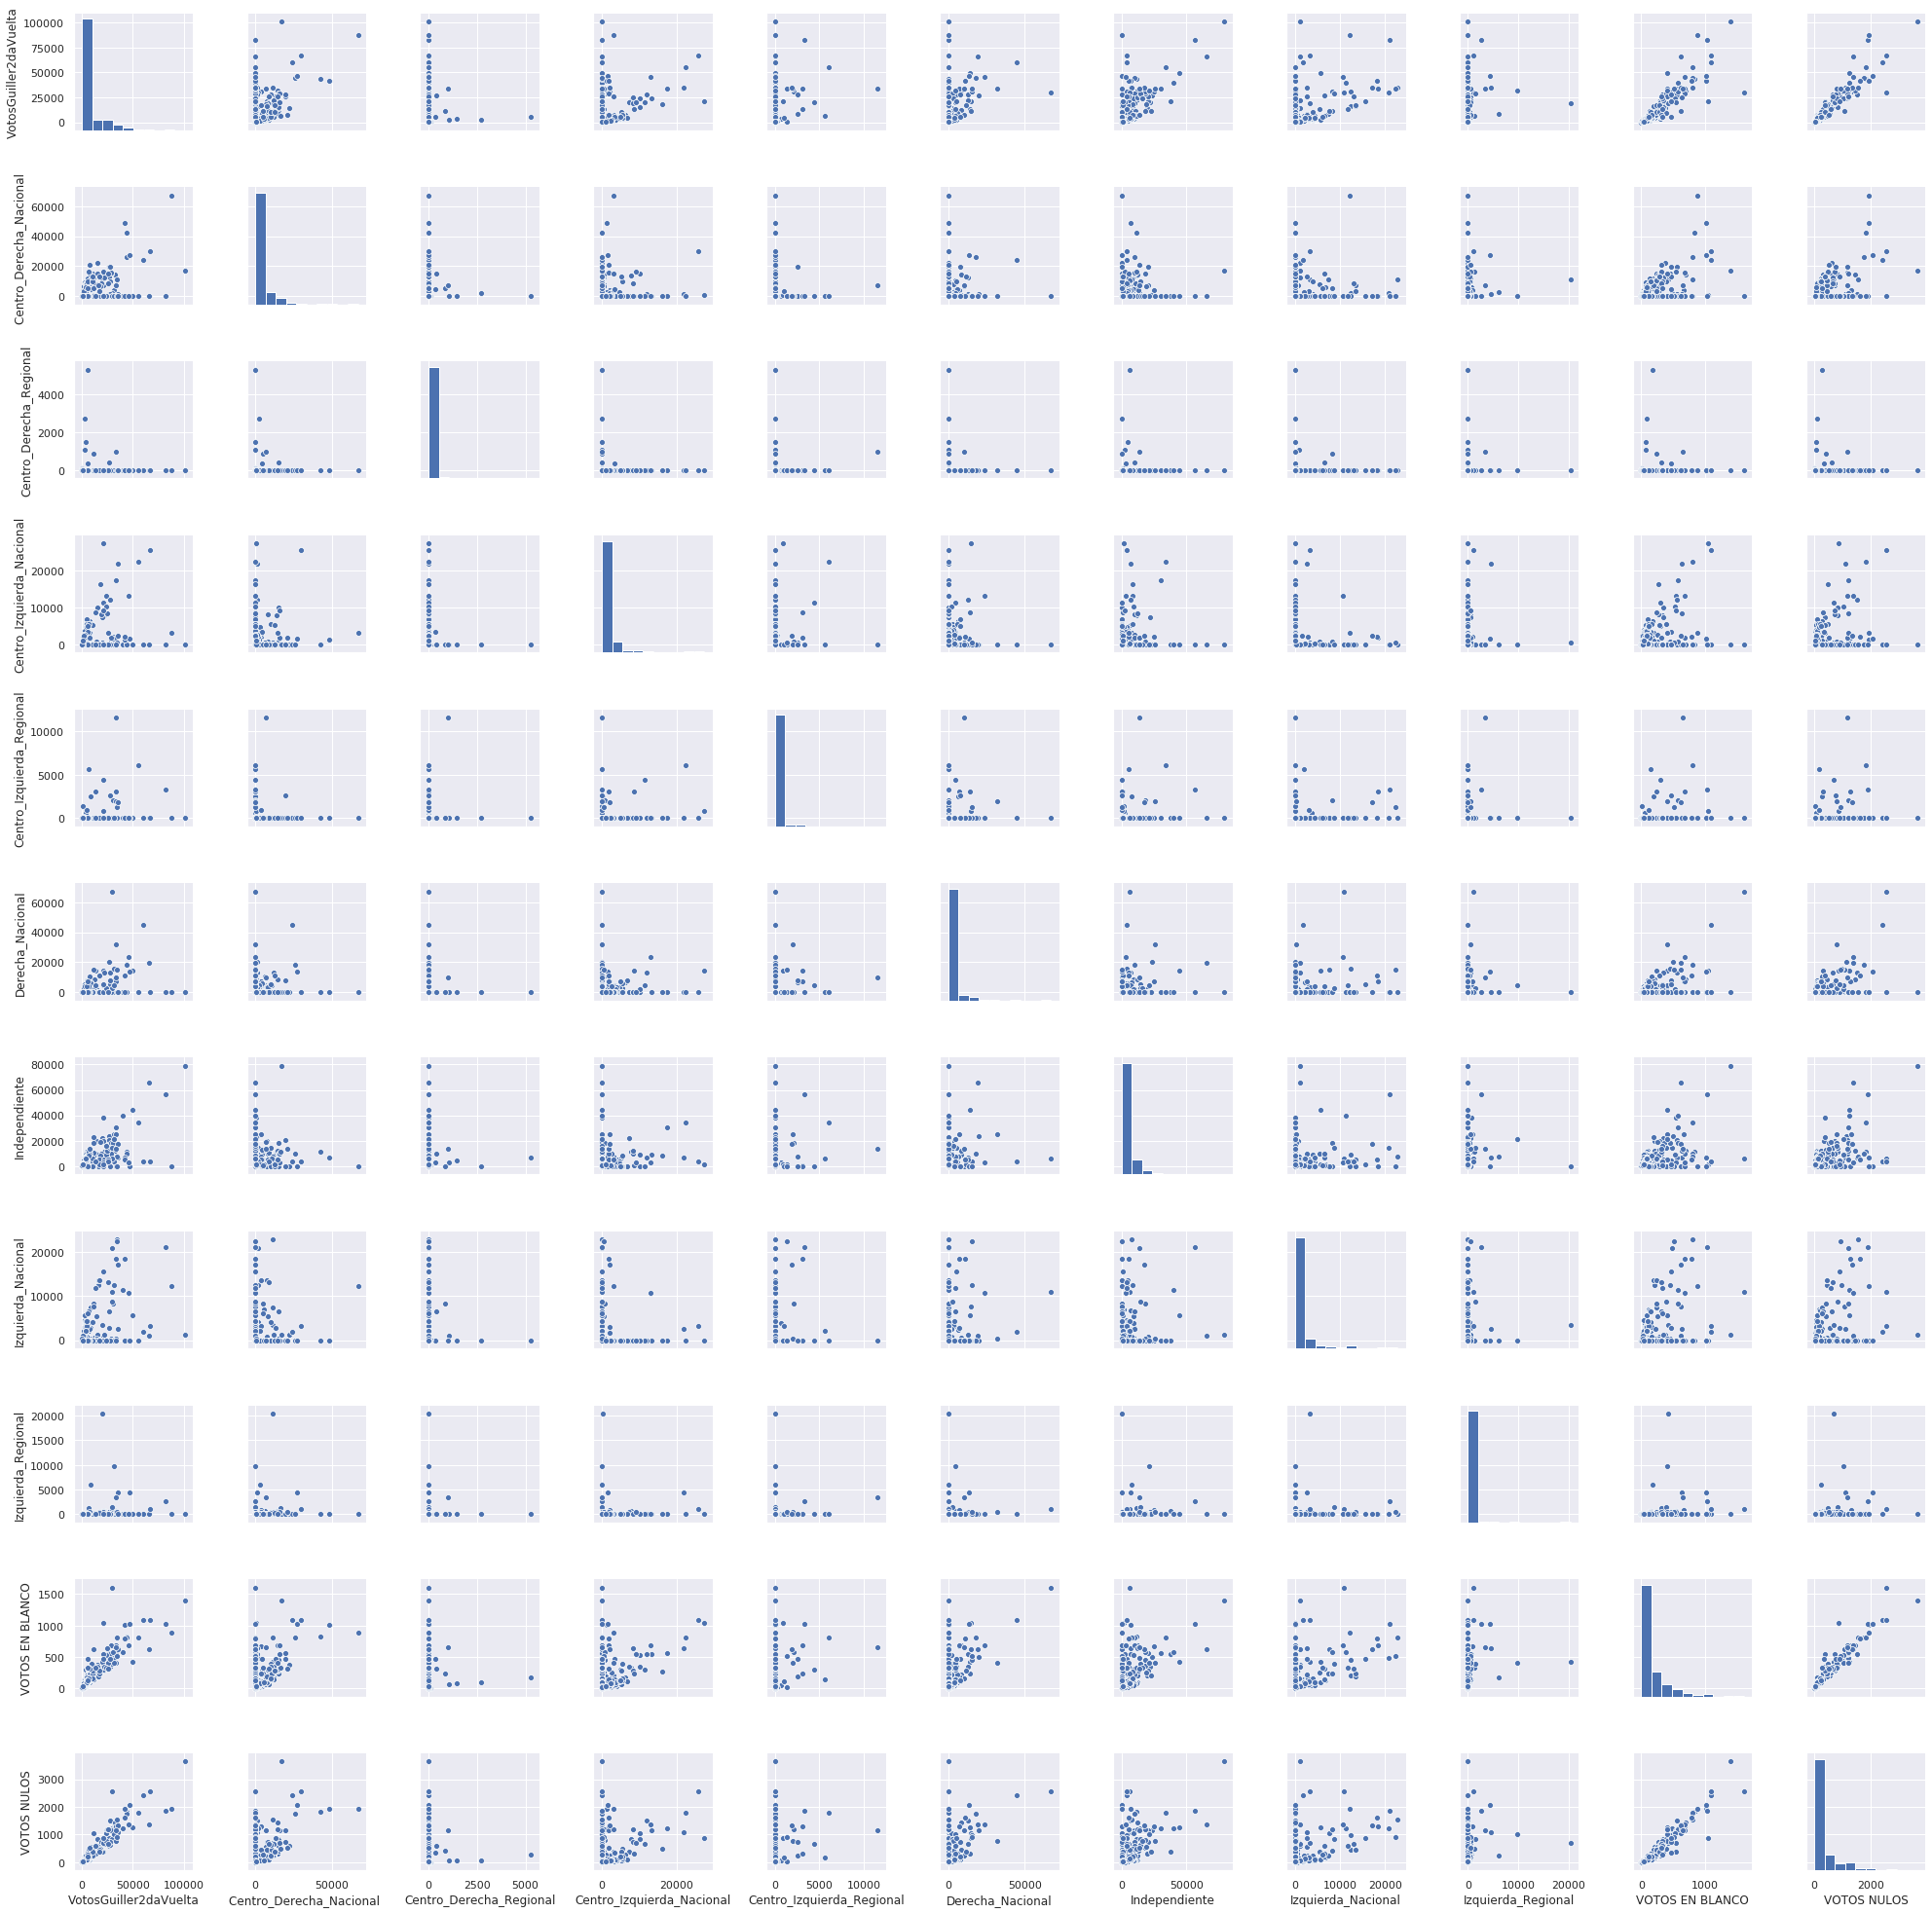

In [0]:

sns.set()
cols = data.columns
#sns.pairplot(dataset[cols], size = 15)
sns.pairplot(data[cols])
plt.show();

In [0]:
data_x = pd.merge(data, dataRegiones, left_on='Comuna',right_on='Comuna',how='inner')
data_x.head()

,Comuna,VotosGuiller2daVuelta,Centro_Derecha_Nacional,Centro_Derecha_Regional,Centro_Izquierda_Nacional,Centro_Izquierda_Regional,Derecha_Nacional,Independiente,Izquierda_Nacional,Izquierda_Regional,VOTOS EN BLANCO,VOTOS NULOS,Región_AISEN DEL GRAL. CARLOS IBAÑEZ,Región_ARICA Y PARINACOTA,Región_DE ANTOFAGASTA,Región_DE ATACAMA,Región_DE COQUIMBO,Región_DE LA ARAUCANIA,Región_DE LOS LAGOS,Región_DE LOS RIOS,Región_DE MAGALLANES Y ANTARTICA CH.,Región_DE TARAPACA,Región_DE VALPARAISO,Región_DEL BIOBIO,Región_DEL LIBERTADOR BDO. O'HIGGINS,Región_DEL MAULE,Región_METROPOLITANA DE SANTIAGO
0,ALTO HOSPICIO,7466,6158.0,0.0,0.0,0.0,4795.0,2098.0,0.0,653.0,148.0,310.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,CAMIÑA,179,951.0,0.0,0.0,0.0,0.0,676.0,0.0,0.0,17.0,18.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,COLCHANE,76,1272.0,0.0,0.0,0.0,0.0,811.0,0.0,0.0,27.0,30.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,HUARA,554,0.0,0.0,1058.0,0.0,0.0,1257.0,0.0,0.0,17.0,18.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,IQUIQUE,27026,1156.0,0.0,0.0,0.0,20108.0,23490.0,0.0,0.0,505.0,1146.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [0]:
y = data_x[[ColumnaY]]
data_comuna= data_x[['Comuna']]
x = data_x.drop(columns=[ColumnaY,'Comuna'])

In [0]:
y.head()

,VotosGuiller2daVuelta
0,7466
1,179
2,76
3,554
4,27026


In [0]:
x.head()

,Centro_Derecha_Nacional,Centro_Derecha_Regional,Centro_Izquierda_Nacional,Centro_Izquierda_Regional,Derecha_Nacional,Independiente,Izquierda_Nacional,Izquierda_Regional,VOTOS EN BLANCO,VOTOS NULOS,Región_AISEN DEL GRAL. CARLOS IBAÑEZ,Región_ARICA Y PARINACOTA,Región_DE ANTOFAGASTA,Región_DE ATACAMA,Región_DE COQUIMBO,Región_DE LA ARAUCANIA,Región_DE LOS LAGOS,Región_DE LOS RIOS,Región_DE MAGALLANES Y ANTARTICA CH.,Región_DE TARAPACA,Región_DE VALPARAISO,Región_DEL BIOBIO,Región_DEL LIBERTADOR BDO. O'HIGGINS,Región_DEL MAULE,Región_METROPOLITANA DE SANTIAGO
0,6158.0,0.0,0.0,0.0,4795.0,2098.0,0.0,653.0,148.0,310.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,951.0,0.0,0.0,0.0,0.0,676.0,0.0,0.0,17.0,18.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1272.0,0.0,0.0,0.0,0.0,811.0,0.0,0.0,27.0,30.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.0,0.0,1058.0,0.0,0.0,1257.0,0.0,0.0,17.0,18.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1156.0,0.0,0.0,0.0,20108.0,23490.0,0.0,0.0,505.0,1146.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Predicciones

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)
print(x_train.shape); print(x_test.shape)

(241, 25)
(104, 25)


In [0]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Entrenamiento y evaluacion
pred_train= model.predict(x_train)
print("Entrenamiento, Error cuadratico medio:",np.sqrt(round(mean_squared_error(y_train,pred_train),3)))
print("Entrenamiento, R2:", r2_score(y_train, pred_train))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len(model.coef_)-1)-1)*(1 - r2_score(y_train, pred_train))
print("Entrenamiento, R2 ajustado:", adj)

pred_test= model.predict(x_test)
print("Testing: Error cuadratico medio", np.sqrt(round(mean_squared_error(y_test,pred_test), 3)))
print("Testing: R2", r2_score(y_test, pred_test))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(model.coef_)-1)-1)*(1 - r2_score(y_test, pred_test))
print("Testing: R2 ajustado", adj)

Entrenamiento, Error cuadratico medio: 2831.5284582712566
Entrenamiento, R2: 0.9664418908887806
Entrenamiento, R2 ajustado: 0.9664418908887806
Testing: Error cuadratico medio 3059.9619670839047
Testing: R2 0.8902246338384109
Testing: R2 ajustado 0.8902246338384109


In [0]:
#Modelo Ridge: penalizacion de los coefientes
ridge = Ridge(alpha=1)

ridge.fit(x_train, y_train) 
pred_train_rr= ridge.predict(x_train)
print("Ridge/Ent - MSE:", np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print("Ridge/Ent -  R2:", r2_score(y_train, pred_train_rr))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len(ridge.coef_)-1)-1)*(1 - r2_score(y_train, pred_train_rr))
print("Ridge/Ent - adjR2:", adj)

pred_test_rr= ridge.predict(x_test)
print("Ridge/Test - MSE:", np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print("Ridge/Test -  R2:", r2_score(y_test, pred_test_rr))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(ridge.coef_)-1)-1)*(1 - r2_score(y_test, pred_test_rr))
print("Ridge/Test - adjR2:", adj)

Ridge/Ent - MSE: 2832.9273016057928
Ridge/Ent -  R2: 0.9664087256702659
Ridge/Ent - adjR2: 0.9664087256702659
Ridge/Test - MSE: 3032.4689219543243
Ridge/Test -  R2: 0.8921883842723058
Ridge/Test - adjR2: 0.8921883842723058


In [0]:
#LASSO
lasso = Lasso(alpha=0.1, tol=00000.1)
lasso.fit(x_train, y_train)

pred_train_lasso= lasso.predict(x_train)
print("LASSO/Ent - MSE:", np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print("LASSO/Ent -  R2:", r2_score(y_train, pred_train_rr))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len(lasso.coef_)-1)-1)*(1 - r2_score(y_train, pred_train_lasso))
print("LASSO/Ent - adjR2:", adj)

pred_test_lasso= lasso.predict(x_test)
print("LASSO/Test - MSE:", np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print("LASSO/Test -  R2:", r2_score(y_test, pred_test_lasso))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(lasso.coef_)-1)-1)*(1 - r2_score(y_test, pred_test_lasso))
print("LASSO/Test - adjR2:", adj)

LASSO/Ent - MSE: 3428.6871453624444
LASSO/Ent -  R2: 0.9664087256702659
LASSO/Ent - adjR2: 0.9453275131228136
LASSO/Test - MSE: 3798.5773020168904
LASSO/Test -  R2: 0.8308333399430721
LASSO/Test - adjR2: 0.7794409368878028


In [0]:
enet = ElasticNet(l1_ratio=0.05, alpha=0.9, tol=00.1)
enet.fit(x_train, y_train) 

pred_train_net= enet.predict(x_train)
print("E.NET/Ent - MSE:", np.sqrt(mean_squared_error(y_train,pred_train_net)))
print("E.NET/Ent -  R2:", r2_score(y_train, pred_train_net))
adj = 1 - float(len(y_train)-1)/(len(y_train)-(len(enet.coef_)-1)-1)*(1 - r2_score(y_train, pred_train_net))
print("E.NET/Ent - adjR2:", adj)

pred_test_net= enet.predict(x_test)
print("E.NET/Test - MSE:", np.sqrt(mean_squared_error(y_test,pred_test_net)))
print("E.NET/Test -  R2:", r2_score(y_test, pred_test_net))
adj = 1 - float(len(y_test)-1)/(len(y_test)-(len(enet.coef_)-1)-1)*(1 - r2_score(y_test, pred_test_net))
print("E.NET/Test - adjR2:", adj)

E.NET/Ent - MSE: 3609.5004794338215
E.NET/Ent -  R2: 0.9454682006931842
E.NET/Ent - adjR2: 0.9394091118813157
E.NET/Test - MSE: 3793.233772036751
E.NET/Test -  R2: 0.8313089450173643
E.NET/Test - adjR2: 0.7800610295796016
